## **研究主題：探討PTT使用者對於新青安政策的討論與看法**

### 研究動機
隨著年齡增長，我的人生規劃也進一步推進，而購屋成為特別需要關注的一部分。政府在2023年8月推出「青年安心成家貸款精進方案」(簡稱新青安)，引發了許多年輕世代的討論，當我在搜尋相關資訊與心得時，注意到網路上存在許多不同甚至對立的意見，這使我想更深入了解人們如何看待這項政策，以及討論內容背後所反映的不同立場與價值觀。

### 研究背景
- 主要原因：房價飆漲，青年購屋困難  

政府希望減輕青年與首購族的購屋壓力，所以進一步推出此方案。申請條件為年滿18歲，且申請人本人、配偶與未成年子女名下均無自有住宅即可。貸款額度最高可到1000萬、成數最高8成、還款年限最長則至40年，寬限期則有5年，可以選擇「本息平均攤還」或是「本金平均攤還」。另外，如果符合條件，也可以與內政部的「自購住宅貸款利息補貼」併用。  

但是，這個方案上路後引起很多討論，有一部分的人認為這項政策確實能幫助年輕人購屋，像是更容易買到理想中的房子，或提早實現人生規劃；但也有人認為，除了房價可能漲得更快，房市也預期會出現拋售潮。
這些不同聲音讓「新青安」成為熱門話題，也帶動了PTT等網路社群的熱烈討論。

- 參考資料  
    - https://www.nta.gov.tw/singlehtml/109
    - https://www.businessweekly.com.tw/focus/indep/6015399
    - https://www.businessweekly.com.tw/business/blog/3016446

### 研究問題
- 民眾討論新青安時，整體情緒是偏正向還是負向？
- 在正面與負面意見中，常出現主題或議題有哪些？
- 如果時間上有變化趨勢，又可能跟哪些議題相關？

### 大綱
1. 資料前處理
2. Lecicon-base情緒分析

In [2]:
import pandas as pd
import re
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import time
from snownlp import SnowNLP

# 解決中文無法顯示問題
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']


In [ ]:
%pwd

'c:\\NSYSU\\analytics_project\\nlp'

### 1. 資料前處理
#### 1.1 基本資料介紹
- 資料來源：PTT抓取Gossiping版
- 抓取時段：2023-08-01 至 2025-08-01
- 關鍵字：新青安、青年安心成家貸款、青安貸款、青年安心成家購屋、青年首購貸款

In [113]:
article = pd.read_csv('./raw_data/articles.csv')
comments = pd.read_csv('./raw_data/comments.csv')

In [114]:
print(f'共有{article.shape[0]}篇文章')
article.head()

共有3094篇文章


,title,time,url,content
0,[請益] 房貸選擇,2025/09/03 11:34,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益\n\n【A銀行】:\n8成\n新青安\n40年\n2年寬限期\n26萬壽險(不...
1,[新聞] 全台房價 自歷史高點回落0.59％,2025/09/03 11:40,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價 自歷史高點回落0.59％\n\n郭及天／台北報導\n2025年9月1日 週一 上午...
2,[請益] 關於內政部的自購住宅貸款利息補貼,2025/09/03 13:35,https://www.ptt.cc/bbs/home-sale/M.1756877717....,爬了許多文還是不太了解\n希望有大大能幫忙解答\n\n這麼說好了，目前我已經有申請新青安+5...
3,Re: [閒聊] 如果把所有房市政策鬆綁取消，台灣會變怎,2025/09/03 16:21,https://www.ptt.cc/bbs/home-sale/M.1756887702....,鬆綁怎麼就只鬆管制部份？你要回歸市場機制就要完全回歸。\n\n新青安就不用講，什麼首購最大這...
4,Re: [新聞] 金管會、央行邀銀行研議 開大房貸水龍頭,2025/09/02 17:14,https://www.ptt.cc/bbs/home-sale/M.1756804442....,: 連結：金管會、央行邀銀行研議 開大房貸水龍頭\n:\nhttps://www.ctee....


In [115]:
print(f'共有{comments.shape[0]}則留言')
comments.head()

共有206322則留言


,artTitle,artUrl,cmtUser,cmtTag,cmtContent,cmtIP,cmtTime
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,rgbff,推,選A然後去金管會檢舉?,NaN,2025/09/03 11:43
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,jkduke,推,選B 三年後換個銀行轉貸,NaN,2025/09/03 11:46
2,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,dontpushme,推,樓上讚,NaN,2025/09/03 11:46
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,hypolen,推,選b檢舉a,NaN,2025/09/03 11:50
4,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,dirk007,推,B,NaN,2025/09/03 11:58


In [116]:
# 確保抓取文章跟關鍵字是一致的
keywords = ['新青安','青年安心成家貸款','青安貸款','青年安心成家購屋','青年首購貸款']
match = '|'.join(keywords)

In [117]:
article = article.loc[article['title'].str.contains(match)|article['content'].str.contains(match), :]
article.reset_index(inplace=True, drop = True)
print(article.shape)

(3094, 4)


#### 1.2 資料清理
- 整理日期的輸出
- 去除NA值
- 去除非中文字詞

In [118]:
article['time'] = pd.to_datetime(article['time'])
article['date'] = article['time'].dt.date
article = article.drop('time',axis=1)
article

,title,url,content,date
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益\n\n【A銀行】:\n8成\n新青安\n40年\n2年寬限期\n26萬壽險(不...,2025-09-03
1,[新聞] 全台房價 自歷史高點回落0.59％,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價 自歷史高點回落0.59％\n\n郭及天／台北報導\n2025年9月1日 週一 上午...,2025-09-03
2,[請益] 關於內政部的自購住宅貸款利息補貼,https://www.ptt.cc/bbs/home-sale/M.1756877717....,爬了許多文還是不太了解\n希望有大大能幫忙解答\n\n這麼說好了，目前我已經有申請新青安+5...,2025-09-03
3,Re: [閒聊] 如果把所有房市政策鬆綁取消，台灣會變怎,https://www.ptt.cc/bbs/home-sale/M.1756887702....,鬆綁怎麼就只鬆管制部份？你要回歸市場機制就要完全回歸。\n\n新青安就不用講，什麼首購最大這...,2025-09-03
4,Re: [新聞] 金管會、央行邀銀行研議 開大房貸水龍頭,https://www.ptt.cc/bbs/home-sale/M.1756804442....,: 連結：金管會、央行邀銀行研議 開大房貸水龍頭\n:\nhttps://www.ctee....,2025-09-02
...,...,...,...,...
3089,[新聞] 減輕年輕人買房負擔！青安貸款升級版今上,https://www.ptt.cc/bbs/home-sale/M.1690905091....,減輕年輕人買房負擔！青安貸款升級版今上路 賴清德一張圖報你知\n\n連結：\nhttps:/...,2023-08-01
3090,Re: [閒聊] 85年次以後的年輕工程師有多慘？,https://www.ptt.cc/bbs/home-sale/M.1690910883....,原文恕刪\n背景交代一下\n小弟正好85年次\n前年台大非電資科系碩班畢業\n上山非產線常日...,2023-08-02
3091,Fw: [新聞] 新青安貸款威力開始了?網曝新北預售屋齊,https://www.ptt.cc/bbs/home-sale/M.1690938079....,作者: CNS3056 (奶奶) 看板: Gossiping\n標題: [新聞] 新青安貸款...,2023-08-02
3092,[新聞] 新青安房貸今上路 建商救命浮木來了？,https://www.ptt.cc/bbs/home-sale/M.1690887173....,連結：\nhttps://money.udn.com/money/story/5621/73...,2023-08-01


In [119]:
comments['cmtTime'] = pd.to_datetime(comments['cmtTime'])
comments['cmtDate'] = comments['cmtTime'].dt.date
comments = comments.drop(columns = ['cmtTime','cmtUser','cmtTag','cmtIP'])
comments

,artTitle,artUrl,cmtContent,cmtDate
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選A然後去金管會檢舉?,2025-09-03
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選B 三年後換個銀行轉貸,2025-09-03
2,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,樓上讚,2025-09-03
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選b檢舉a,2025-09-03
4,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,B,2025-09-03
...,...,...,...,...
206317,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,羨慕 我拿不到了,2023-08-01
206318,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,曾幾何時千萬代表豪宅 百萬代表名車 ..,2023-08-01
206319,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,放屁 沒救了 房價噴上去很難降,2023-08-01
206320,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問，請問滿18歲的學生可以貸嗎？,2023-08-01


In [120]:
# 文章內容正規處理
article['content'] = article.content.apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '', x))
article

,title,url,content,date
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03
1,[新聞] 全台房價 自歷史高點回落0.59％,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價自歷史高點回落郭及天台北報導年月日週一上午去年月日央行第七波選擇性信用管制出爐成為這...,2025-09-03
2,[請益] 關於內政部的自購住宅貸款利息補貼,https://www.ptt.cc/bbs/home-sale/M.1756877717....,爬了許多文還是不太了解希望有大大能幫忙解答這麼說好了目前我已經有申請新青安年寬限期貸款是萬利...,2025-09-03
3,Re: [閒聊] 如果把所有房市政策鬆綁取消，台灣會變怎,https://www.ptt.cc/bbs/home-sale/M.1756887702....,鬆綁怎麼就只鬆管制部份你要回歸市場機制就要完全回歸新青安就不用講什麼首購最大這種鳥觀念也都要...,2025-09-03
4,Re: [新聞] 金管會、央行邀銀行研議 開大房貸水龍頭,https://www.ptt.cc/bbs/home-sale/M.1756804442....,連結金管會央行邀銀行研議開大房貸水龍頭內文民眾想買房卻貸不到款卓揆日前喊話希望銀行放款水龍頭...,2025-09-02
...,...,...,...,...
3089,[新聞] 減輕年輕人買房負擔！青安貸款升級版今上,https://www.ptt.cc/bbs/home-sale/M.1690905091....,減輕年輕人買房負擔青安貸款升級版今上路賴清德一張圖報你知連結內文記者盧素梅台北報導青年安心成...,2023-08-01
3090,Re: [閒聊] 85年次以後的年輕工程師有多慘？,https://www.ptt.cc/bbs/home-sale/M.1690910883....,原文恕刪背景交代一下小弟正好年次前年台大非電資科系碩班畢業上山非產線常日班目前年資剛好兩年家...,2023-08-02
3091,Fw: [新聞] 新青安貸款威力開始了?網曝新北預售屋齊,https://www.ptt.cc/bbs/home-sale/M.1690938079....,作者奶奶看板標題新聞新青安貸款威力開始了網曝新北預售屋齊時間媒體來源記者署名余奕賢完整新聞標...,2023-08-02
3092,[新聞] 新青安房貸今上路 建商救命浮木來了？,https://www.ptt.cc/bbs/home-sale/M.1690887173....,連結內文經濟日報記者游智文即時報導新版青年安心成家優惠房貸專案今日上路元宏不動產加值服務平台...,2023-08-01


In [121]:
# 留言正規處理
comments['cmtContent'] = comments.cmtContent.astype(str).apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '', x))
comments = comments[comments['cmtContent'].str.strip() != '']
comments

,artTitle,artUrl,cmtContent,cmtDate
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選然後去金管會檢舉,2025-09-03
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選三年後換個銀行轉貸,2025-09-03
2,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,樓上讚,2025-09-03
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選檢舉,2025-09-03
5,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,還敢綁壽險阿,2025-09-03
...,...,...,...,...
206317,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,羨慕我拿不到了,2023-08-01
206318,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,曾幾何時千萬代表豪宅百萬代表名車,2023-08-01
206319,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,放屁沒救了房價噴上去很難降,2023-08-01
206320,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01


#### 1.3 斷詞與移除停用字
- 設定中文詞庫
- 斷詞使用Jieba

**文章部分**

In [122]:
# 設定繁體中文詞庫
jieba.set_dictionary('./dict/dict.txt.big')
# 設定自定義詞庫
jieba.load_userdict('./dict/user_dict.txt')

# 停用字
with open('./dict/stopwords.txt', encoding='utf-8') as f:
    stopwords = [line.strip() for line in f.readlines()]

Building prefix dict from c:\NSYSU\analytics_project\nlp\dict\dict.txt.big ...
Loading model from cache C:\Users\Shelly\AppData\Local\Temp\jieba.u0f7b98df0d0af54dc1d176608c9315c1.cache
Loading model cost 1.279 seconds.
Prefix dict has been built successfully.


In [123]:
# 針對文章內容進行斷詞
article_token = article.assign(word=article['content'].apply(lambda x: jieba.lcut(x))).explode('word').reset_index(drop=True)


In [124]:
article_token

,title,url,content,date,word
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,貸款
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,選擇
2,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,請益
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,銀行
4,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,成
...,...,...,...,...,...
1120774,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,上車
1120775,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,的
1120776,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,乘客
1120777,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,請


In [125]:
article_token = article_token.loc[article_token['word'].str.len()>1]
article_token

,title,url,content,date,word
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,貸款
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,選擇
2,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,請益
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,銀行
5,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,新青安
...,...,...,...,...,...
1120771,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,啟動
1120773,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,還沒
1120774,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,上車
1120776,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,乘客


In [126]:
with open('./dict/stopwords.txt',encoding = 'utf-8') as f:
    stopwords = [line.strip() for line in f.readlines()]

article_token = article_token.loc[~article_token['word'].isin(stopwords)]
article_token

,title,url,content,date,word
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,貸款
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,選擇
2,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,請益
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,銀行
5,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,新青安
...,...,...,...,...,...
1120771,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,啟動
1120773,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,還沒
1120774,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,上車
1120776,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,乘客


**留言部分**

In [127]:
# 針對留言進行斷詞
comments = comments.assign(word=comments['cmtContent'].apply(lambda x: jieba.lcut(x))).explode('word').reset_index(drop=True)
comments= comments.loc[comments['word'].str.len()>1]
comments

,artTitle,artUrl,cmtContent,cmtDate,word
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選然後去金管會檢舉,2025-09-03,然後
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選然後去金管會檢舉,2025-09-03,金管會
4,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選然後去金管會檢舉,2025-09-03,檢舉
6,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選三年後換個銀行轉貸,2025-09-03,三年
8,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選三年後換個銀行轉貸,2025-09-03,換個
...,...,...,...,...,...
1797284,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01,滿歲
1797286,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01,學生
1797287,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01,可以
1797290,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,全面救金主嗎,2023-08-01,全面


In [128]:
with open('./dict/stopwords.txt',encoding = 'utf-8') as f:
    stopwords = [line.strip() for line in f.readlines()]

comments = comments.loc[~comments['word'].isin(stopwords)]
comments

,artTitle,artUrl,cmtContent,cmtDate,word
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選然後去金管會檢舉,2025-09-03,金管會
4,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選然後去金管會檢舉,2025-09-03,檢舉
6,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選三年後換個銀行轉貸,2025-09-03,三年
8,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選三年後換個銀行轉貸,2025-09-03,換個
9,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選三年後換個銀行轉貸,2025-09-03,銀行
...,...,...,...,...,...
1797283,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01,請問
1797284,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01,滿歲
1797286,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01,學生
1797290,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,全面救金主嗎,2023-08-01,全面


In [129]:
# 合併斷詞後的文章與留言
comments = comments.rename(columns={'cmtDate':'date', 'artUrl':'url'})
data = pd.concat([article_token.loc[:,["date","url","word"]],comments.loc[:,["date","url","word"]]],axis=0)
data

,date,url,word
0,2025-09-03,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款
1,2025-09-03,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選擇
2,2025-09-03,https://www.ptt.cc/bbs/home-sale/M.1756870456....,請益
3,2025-09-03,https://www.ptt.cc/bbs/home-sale/M.1756870456....,銀行
5,2025-09-03,https://www.ptt.cc/bbs/home-sale/M.1756870456....,新青安
...,...,...,...
1797283,2023-08-01,https://www.ptt.cc/bbs/home-sale/M.1690847681....,請問
1797284,2023-08-01,https://www.ptt.cc/bbs/home-sale/M.1690847681....,滿歲
1797286,2023-08-01,https://www.ptt.cc/bbs/home-sale/M.1690847681....,學生
1797290,2023-08-01,https://www.ptt.cc/bbs/home-sale/M.1690847681....,全面


- 與新青安相關討論中出現頻率最高的20個詞
    - 「銀行」、「房價」、「貸款」：與新青安的制度有關
    - 「政府」、「政策」：討論常與政策制定相關，或關注政府對事件的處理或說明
    - 「首購」、「寬限期」、「利率」：顯示首購族對於購屋的考量
    - 「投資」、「買房」、「台灣」：可能與新青安是否被用來炒房、或與臺灣整體房市、房價的變化有關

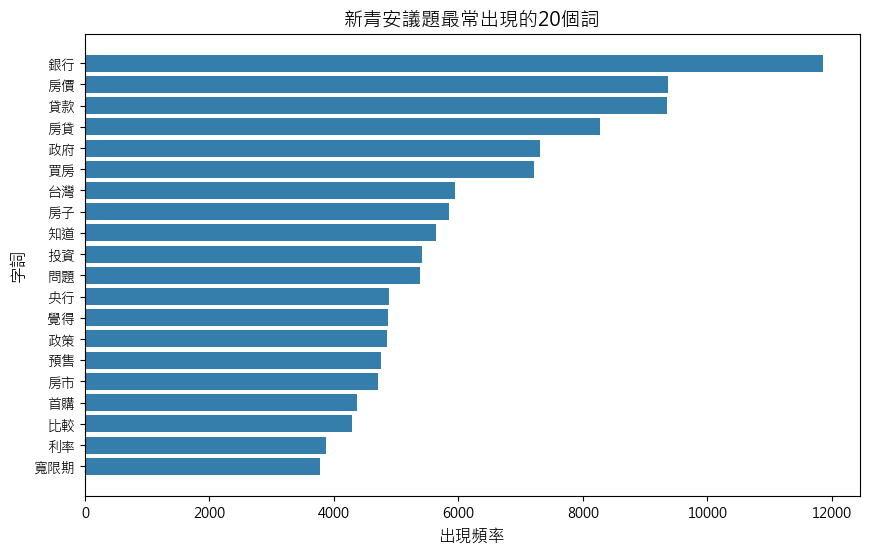

In [130]:
# 計算常出現的字
word_frq = data.groupby(['word'],as_index=False).size()
word_frq.sort_values(by=['size'], ascending=False,inplace=True)  #排序
word_frq = word_frq[word_frq['size']>10]  # 過濾出現太少次的字

# 過濾掉新青安的詞 
exclude_words = ['新青安','青年安心成家貸款','青安貸款','青年安心成家購屋','青年首購貸款']
word_frq = word_frq[~word_frq['word'].isin(exclude_words)] 

# 繪製前20常出現的字
n = 20
plot_n = word_frq.head(20)

plt.figure(figsize = (10,6))
plt.barh(plot_n['word'], plot_n['size'], color = '#357dab')
plt.xlabel('出現頻率', fontsize = 12)
plt.ylabel('字詞', fontsize = 12)
plt.title('新青安議題最常出現的20個詞', fontsize = 14)
plt.gca().invert_yaxis()
plt.show()

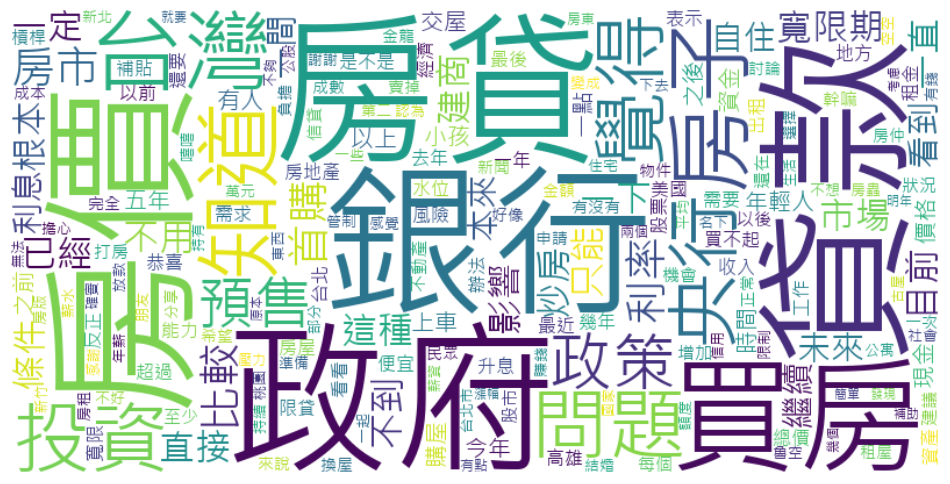

In [131]:
# 繪製文字雲
word = " ".join(word_frq['word'].to_list())

wc = WordCloud(
    font_path='msjh.ttc',
    width = 800,
    height = 400, background_color='white'
).generate(word)

plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2. Lexicon-based 情緒分析 

In [132]:
# 載入liwc檔案

# 建立空的list
d_liwc = []

for label in ["positive", "negative"]:
    filename = f"./liwc/{label}.txt"
    with open(filename, "r", encoding="utf-8") as f:
        # 讀檔，以逗號分開
        words = f.read().strip().split(",")
        words = [w.strip() for w in words if w.strip()]  # 去掉空白
        for w in words:
            d_liwc.append([w, label])

df_liwc = pd.DataFrame(d_liwc, columns=["word", "sentiments"])

In [133]:
df_liwc

,word,sentiments
0,﻿一流,positive
1,下定決心,positive
2,不拘小節,positive
3,不費力,positive
4,不錯,positive
...,...,...
1706,麻煩,negative
1707,默哀,negative
1708,黯淡,negative
1709,鼻酸,negative


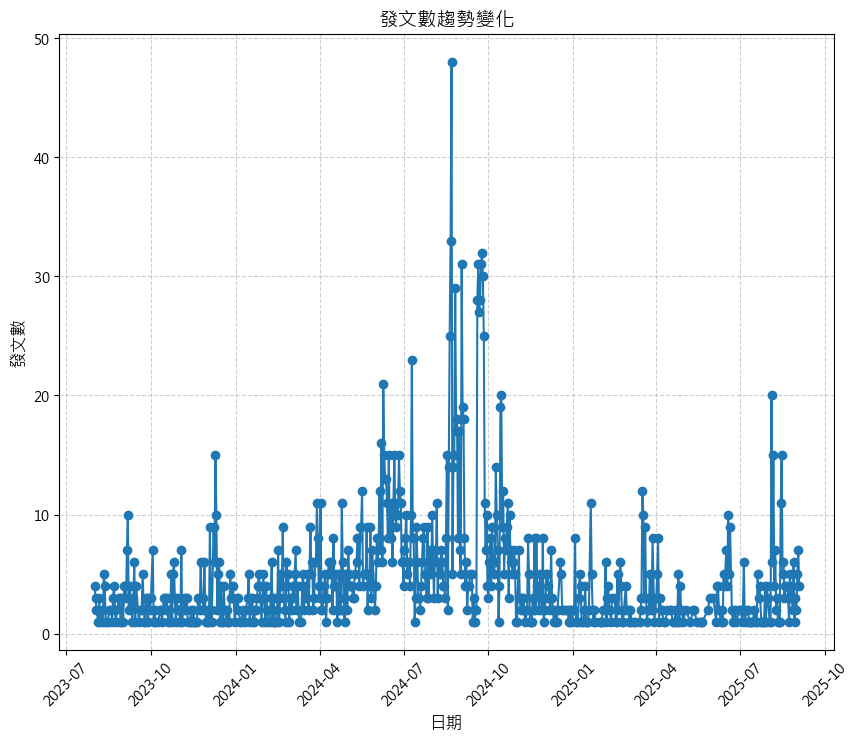

In [134]:
article['date'] = pd.to_datetime(article['date'], errors= 'coerce') # pd.to_datetime語法 : errors用來處理轉換失敗的值
create_frq = article.groupby(article['date'].dt.date).size()

plt.figure(figsize=(10,8))
plt.plot(create_frq.index, create_frq.values, marker = 'o', linestyle = '-')
plt.title('發文數趨勢變化',fontsize = 14)
plt.xlabel('日期', fontsize = 12)
plt.ylabel('發文數', fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()


In [135]:
create_frq.sort_values(ascending=False).head(10)

date
2024-08-22    48
2024-08-21    33
2024-09-24    32
2024-09-20    31
2024-09-02    31
2024-09-23    31
2024-09-25    30
2024-08-26    29
2024-09-22    28
2024-09-19    28
dtype: int64

此部分進一步分析發文數前10名的日期，並檢視其內文與標題，辨識當時被熱烈討論的議題，並嘗試連結可能的外部事件脈絡。

In [136]:
df_liwc

,word,sentiments
0,﻿一流,positive
1,下定決心,positive
2,不拘小節,positive
3,不費力,positive
4,不錯,positive
...,...,...
1706,麻煩,negative
1707,默哀,negative
1708,黯淡,negative
1709,鼻酸,negative


#### 2.1 正負向情緒分數聲量折線圖

In [137]:
# 合併文章斷詞與情緒字典(保留同時存在於文章裡，又在情緒字典裡的詞)
data_liwc = pd.merge(article_token, df_liwc, on='word', how='inner')
data_liwc

,title,url,content,date,word,sentiments
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,值得,positive
1,[新聞] 全台房價 自歷史高點回落0.59％,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價自歷史高點回落郭及天台北報導年月日週一上午去年月日央行第七波選擇性信用管制出爐成為這...,2025-09-03,無力,negative
2,[新聞] 全台房價 自歷史高點回落0.59％,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價自歷史高點回落郭及天台北報導年月日週一上午去年月日央行第七波選擇性信用管制出爐成為這...,2025-09-03,支撐,positive
3,[新聞] 全台房價 自歷史高點回落0.59％,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價自歷史高點回落郭及天台北報導年月日週一上午去年月日央行第七波選擇性信用管制出爐成為這...,2025-09-03,驚人,positive
4,[新聞] 全台房價 自歷史高點回落0.59％,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價自歷史高點回落郭及天台北報導年月日週一上午去年月日央行第七波選擇性信用管制出爐成為這...,2025-09-03,驚人,negative
...,...,...,...,...,...,...
31450,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,不利,negative
31451,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,協助,positive
31452,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,免費,positive
31453,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,相信,positive


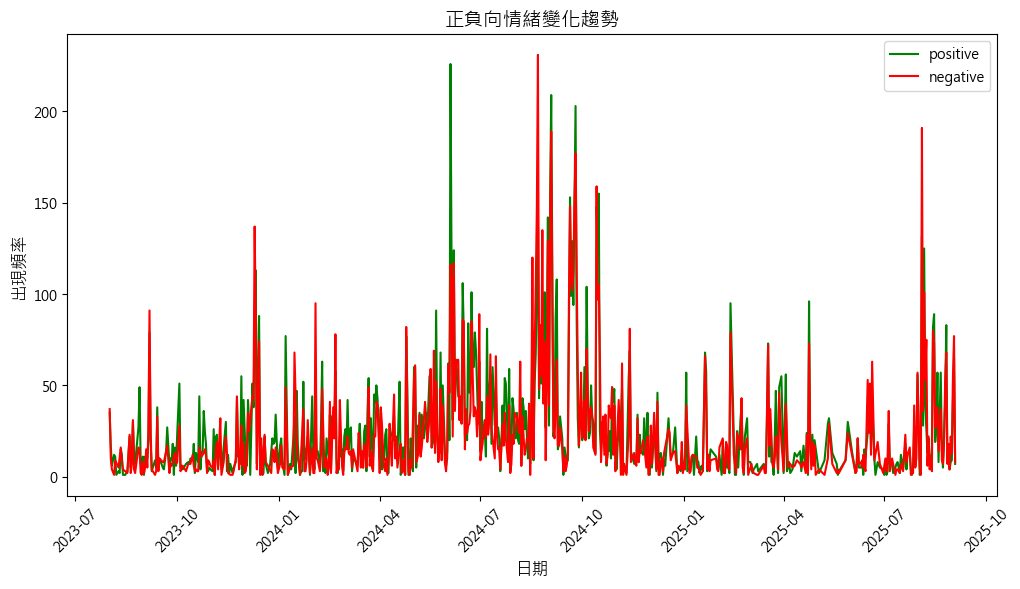

In [138]:
# 計算每日的情緒數量並繪製成折線圖
sentiment_count = (data_liwc.groupby(['date','sentiments']).size().reset_index(name='count'))

plt.figure(figsize=(12,6))
for sentiment, color in zip(['positive','negative'],['green','red']): # 分別處理
    subset = sentiment_count[sentiment_count['sentiments'] == sentiment]
    plt.plot(subset['date'], subset['count'], label = sentiment, color = color)

plt.legend()
plt.title('正負向情緒變化趨勢', fontsize = 14)
plt.xlabel('日期', fontsize = 12)
plt.ylabel('出現頻率', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

In [139]:
# 前10正向聲量最高的日期
sentiment_count[sentiment_count['sentiments'] == 'positive'].sort_values('count', ascending=False)

,date,sentiments,count
517,2024-06-04,positive,226
695,2024-09-03,positive,209
736,2024-09-25,positive,203
776,2024-10-16,positive,155
726,2024-09-20,positive,153
...,...,...,...
145,2023-11-04,positive,1
46,2023-09-01,positive,1
87,2023-09-28,positive,1
1182,2025-08-02,positive,1


In [140]:
# 前10負向聲量最高的日期
sentiment_count[sentiment_count['sentiments'] == 'negative'].sort_values('count', ascending=False)

,date,sentiments,count
670,2024-08-22,negative,231
1185,2025-08-04,negative,191
694,2024-09-03,negative,189
735,2024-09-25,negative,177
771,2024-10-14,negative,159
...,...,...,...
439,2024-04-24,negative,1
1148,2025-07-11,negative,1
407,2024-04-08,negative,1
1168,2025-07-25,negative,1


#### 2.2 正負向情緒分數比例折線圖

In [141]:
daily_total = sentiment_count.groupby('date')['count'].sum().reset_index(name = 'daily_total')
sentiment_countr = sentiment_count.merge(daily_total, on='date', how='left')
sentiment_countr['ratio'] = sentiment_countr['count'] / sentiment_countr['daily_total']
sentiment_countr

,date,sentiments,count,daily_total,ratio
0,2023-08-01,negative,37,72,0.513889
1,2023-08-01,positive,35,72,0.486111
2,2023-08-02,negative,10,27,0.370370
3,2023-08-02,positive,17,27,0.629630
4,2023-08-03,negative,4,10,0.400000
...,...,...,...,...,...
1240,2025-09-01,positive,41,95,0.431579
1241,2025-09-02,negative,77,142,0.542254
1242,2025-09-02,positive,65,142,0.457746
1243,2025-09-03,negative,8,15,0.533333


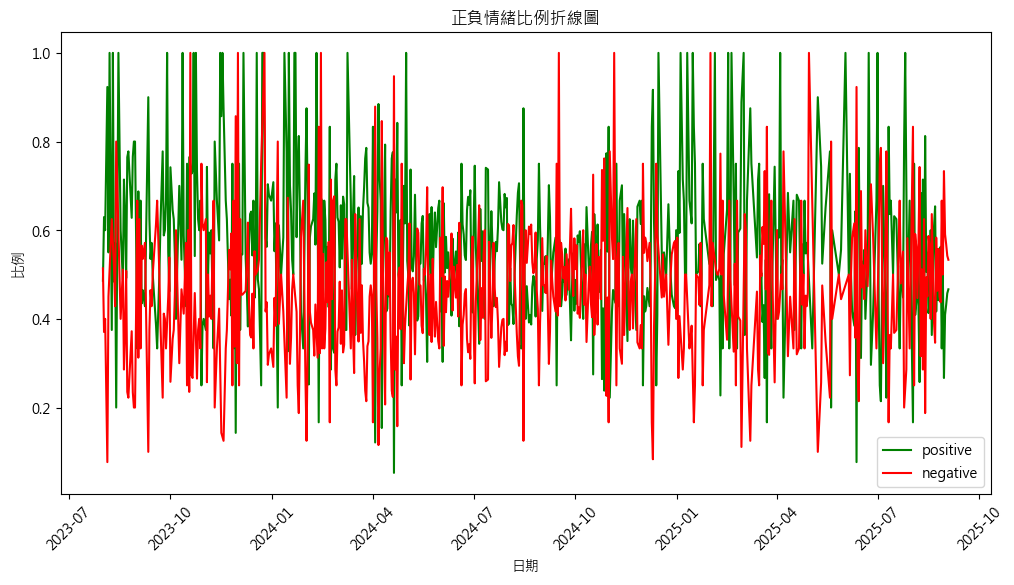

In [142]:
plt.figure(figsize=(12,6))

for sentiment, color in zip(['positive','negative'],['green','red']):
    subset = sentiment_countr[sentiment_countr['sentiments'] == sentiment]
    plt.plot(subset['date'], subset['ratio'], label = sentiment, color = color) 

plt.legend()
plt.title('正負情緒比例折線圖')
plt.xlabel('日期')
plt.ylabel('比例')
plt.xticks(rotation = 45)
plt.show()

#### 2.3 正負向情緒代表字

In [143]:
# 計算正負向情緒前20名的詞
sentiment_frq =  data_liwc.groupby(['sentiments','word']).size().reset_index(name='count') 
top20_pos = sentiment_frq[sentiment_frq['sentiments'] == 'positive'].nlargest(20, 'count')
top20_neg = sentiment_frq[sentiment_frq['sentiments'] == 'negative'].nlargest(20, 'count')

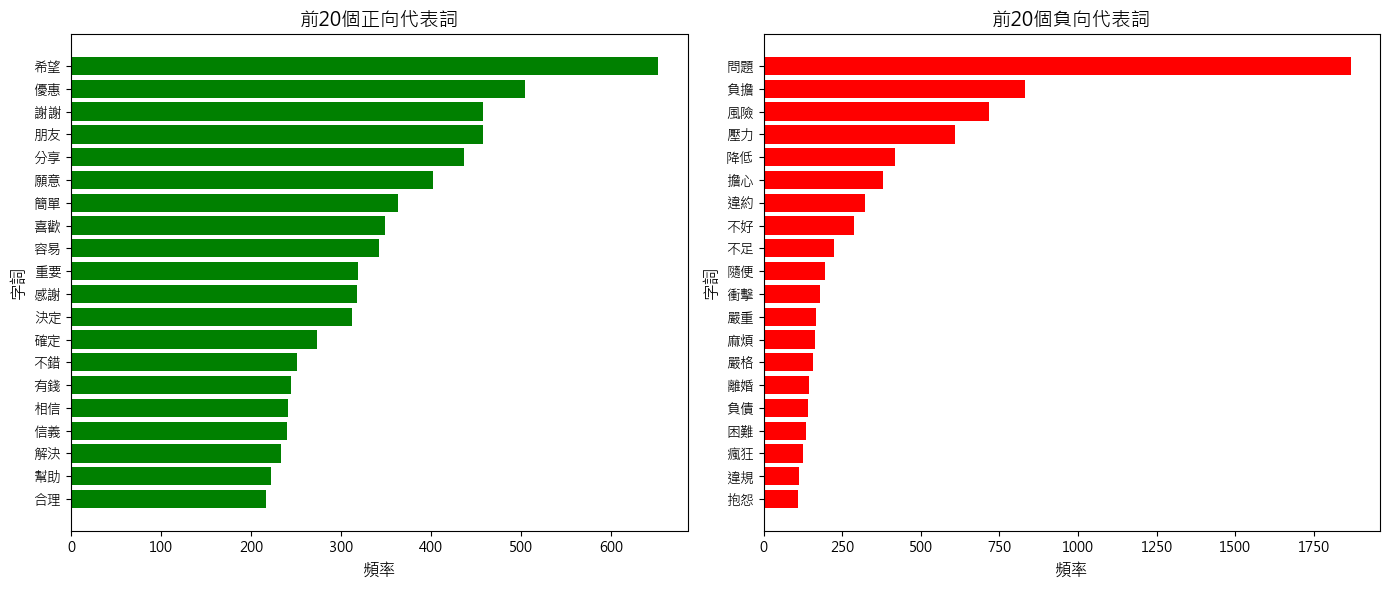

In [144]:
fig, axes = plt.subplots(1, 2, figsize = (14,6))

axes[0].barh(top20_pos['word'], top20_pos['count'], color = 'green')
axes[0].set_title('前20個正向代表詞', fontsize = 14)
axes[0].invert_yaxis() # 數量最多排最前面
axes[0].set_xlabel('頻率', fontsize = 12)
axes[0].set_ylabel('字詞', fontsize = 12)


axes[1].barh(top20_neg['word'], top20_neg['count'], color = 'red')
axes[1].set_title('前20個負向代表詞', fontsize = 14)
axes[1].invert_yaxis()
axes[1].set_xlabel('頻率', fontsize = 12)
axes[1].set_ylabel('字詞', fontsize = 12)

plt.tight_layout()
plt.show()



#### 2.4 文字雲
- 針對正負面聲量相差最多的時間分析

##### 2024-06-04正向聲量最高

In [145]:
data_liwc['date'] = pd.to_datetime(data_liwc['date'], errors = 'coerce')
pos_words = data_liwc[(data_liwc['date'] == '2024-06-04') & 
                      (data_liwc['sentiments'] == 'positive')]['word']
pos_words

21684    優點
21687    確定
21688    優點
21690    感謝
21691    感謝
         ..
22011    解決
22015    決定
22019    解決
22023    復甦
22024    吸引
Name: word, Length: 226, dtype: object

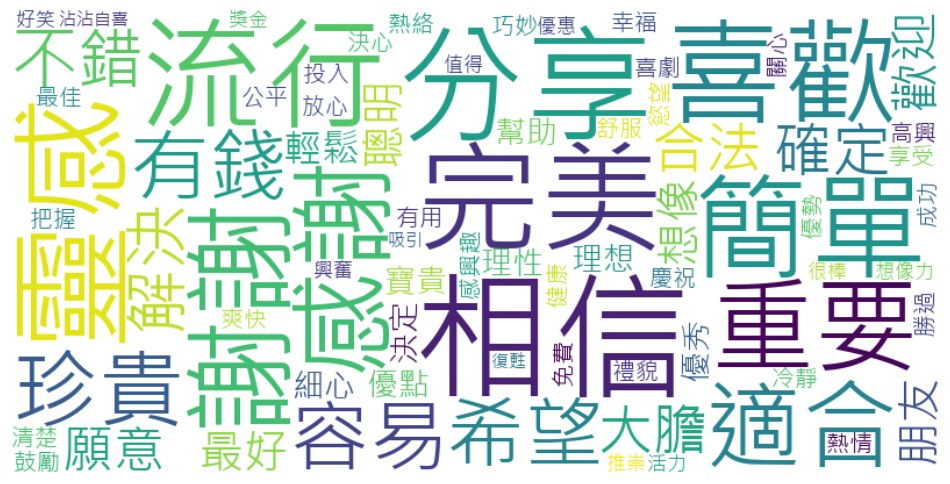

In [146]:
pos_list = " ".join(pos_words.to_list())

pos_wc = WordCloud(
    font_path='msjh.ttc',
    width=800,
    height=400,
    background_color='white'
).generate(pos_list)

plt.figure(figsize=(12,10))
plt.imshow(pos_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

##### 2024-08-22 負向聲量最高

In [147]:
neg_words = data_liwc[(data_liwc['date'] == '2024-08-22') & (data_liwc['sentiments'] == 'negative')]['word']
neg_words  

15287    緊繃
15288    受害
15289    困擾
15296    衝擊
15298    違約
         ..
15673    負擔
15676    問題
15677    負擔
15678    負擔
15679    風險
Name: word, Length: 231, dtype: object

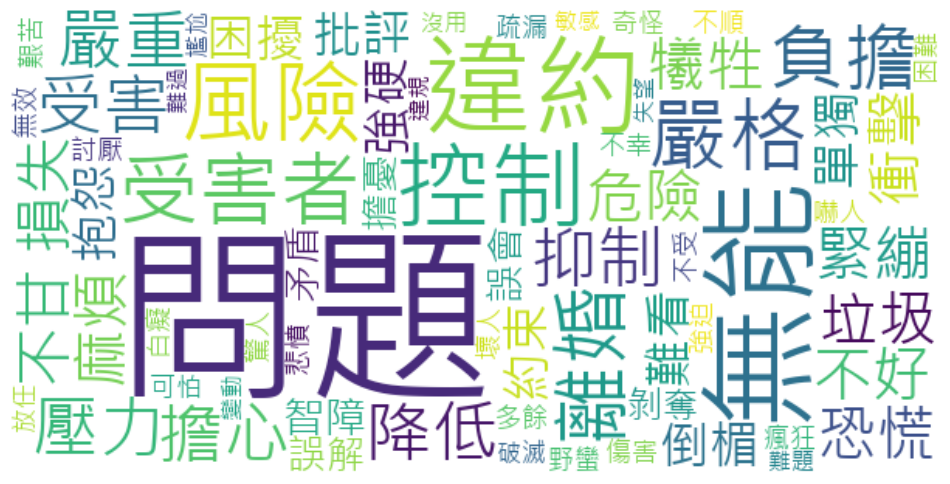

In [148]:
neg_list = " ".join(neg_words.to_list())

neg_wc = WordCloud(
    font_path='msjh.ttc',
    width=600,
    height=300,
    background_color='white'
).generate(neg_list)

plt.figure(figsize=(12,10))
plt.imshow(neg_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 3. CKIP 

In [149]:
# # 下載ckip model
# data_utils.download_data_gdown("./")

In [72]:
# To use CPU
ws = WS('./data')
pos = POS('./data')
ner = NER('./data')


c:\Users\Shelly\new_anaconda3\envs\loan\lib\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
c:\Users\Shelly\new_anaconda3\envs\loan\lib\site-packages\ckiptagger\model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
c:\Users\Shelly\new_anaconda3\envs\loan\lib\site-packages\ckiptagger\model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v

#### 3.1 使用CKIP進行分析

In [4]:
article = pd.read_csv('./raw_data/articles.csv')
article

,title,time,url,content
0,[請益] 房貸選擇,2025/09/03 11:34,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益\n\n【A銀行】:\n8成\n新青安\n40年\n2年寬限期\n26萬壽險(不...
1,[新聞] 全台房價 自歷史高點回落0.59％,2025/09/03 11:40,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價 自歷史高點回落0.59％\n\n郭及天／台北報導\n2025年9月1日 週一 上午...
2,[請益] 關於內政部的自購住宅貸款利息補貼,2025/09/03 13:35,https://www.ptt.cc/bbs/home-sale/M.1756877717....,爬了許多文還是不太了解\n希望有大大能幫忙解答\n\n這麼說好了，目前我已經有申請新青安+5...
3,Re: [閒聊] 如果把所有房市政策鬆綁取消，台灣會變怎,2025/09/03 16:21,https://www.ptt.cc/bbs/home-sale/M.1756887702....,鬆綁怎麼就只鬆管制部份？你要回歸市場機制就要完全回歸。\n\n新青安就不用講，什麼首購最大這...
4,Re: [新聞] 金管會、央行邀銀行研議 開大房貸水龍頭,2025/09/02 17:14,https://www.ptt.cc/bbs/home-sale/M.1756804442....,: 連結：金管會、央行邀銀行研議 開大房貸水龍頭\n:\nhttps://www.ctee....
...,...,...,...,...
3089,[新聞] 減輕年輕人買房負擔！青安貸款升級版今上,2023/08/01 23:51,https://www.ptt.cc/bbs/home-sale/M.1690905091....,減輕年輕人買房負擔！青安貸款升級版今上路 賴清德一張圖報你知\n\n連結：\nhttps:/...
3090,Re: [閒聊] 85年次以後的年輕工程師有多慘？,2023/08/02 01:28,https://www.ptt.cc/bbs/home-sale/M.1690910883....,原文恕刪\n背景交代一下\n小弟正好85年次\n前年台大非電資科系碩班畢業\n上山非產線常日...
3091,Fw: [新聞] 新青安貸款威力開始了?網曝新北預售屋齊,2023/08/02 09:01,https://www.ptt.cc/bbs/home-sale/M.1690938079....,作者: CNS3056 (奶奶) 看板: Gossiping\n標題: [新聞] 新青安貸款...
3092,[新聞] 新青安房貸今上路 建商救命浮木來了？,2023/08/01 18:52,https://www.ptt.cc/bbs/home-sale/M.1690887173....,連結：\nhttps://money.udn.com/money/story/5621/73...


In [ ]:
article.insert(0, 'status_id', range(1, len(article)+1))
article

,status_id,title,time,url,content
0,1,[請益] 房貸選擇,2025/09/03 11:34,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益\n\n【A銀行】:\n8成\n新青安\n40年\n2年寬限期\n26萬壽險(不...
1,2,[新聞] 全台房價 自歷史高點回落0.59％,2025/09/03 11:40,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價 自歷史高點回落0.59％\n\n郭及天／台北報導\n2025年9月1日 週一 上午...
2,3,[請益] 關於內政部的自購住宅貸款利息補貼,2025/09/03 13:35,https://www.ptt.cc/bbs/home-sale/M.1756877717....,爬了許多文還是不太了解\n希望有大大能幫忙解答\n\n這麼說好了，目前我已經有申請新青安+5...
3,4,Re: [閒聊] 如果把所有房市政策鬆綁取消，台灣會變怎,2025/09/03 16:21,https://www.ptt.cc/bbs/home-sale/M.1756887702....,鬆綁怎麼就只鬆管制部份？你要回歸市場機制就要完全回歸。\n\n新青安就不用講，什麼首購最大這...
4,5,Re: [新聞] 金管會、央行邀銀行研議 開大房貸水龍頭,2025/09/02 17:14,https://www.ptt.cc/bbs/home-sale/M.1756804442....,: 連結：金管會、央行邀銀行研議 開大房貸水龍頭\n:\nhttps://www.ctee....
...,...,...,...,...,...
3089,3090,[新聞] 減輕年輕人買房負擔！青安貸款升級版今上,2023/08/01 23:51,https://www.ptt.cc/bbs/home-sale/M.1690905091....,減輕年輕人買房負擔！青安貸款升級版今上路 賴清德一張圖報你知\n\n連結：\nhttps:/...
3090,3091,Re: [閒聊] 85年次以後的年輕工程師有多慘？,2023/08/02 01:28,https://www.ptt.cc/bbs/home-sale/M.1690910883....,原文恕刪\n背景交代一下\n小弟正好85年次\n前年台大非電資科系碩班畢業\n上山非產線常日...
3091,3092,Fw: [新聞] 新青安貸款威力開始了?網曝新北預售屋齊,2023/08/02 09:01,https://www.ptt.cc/bbs/home-sale/M.1690938079....,作者: CNS3056 (奶奶) 看板: Gossiping\n標題: [新聞] 新青安貸款...
3092,3093,[新聞] 新青安房貸今上路 建商救命浮木來了？,2023/08/01 18:52,https://www.ptt.cc/bbs/home-sale/M.1690887173....,連結：\nhttps://money.udn.com/money/story/5621/73...


In [ ]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    final_res = []
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
    
#     paragraphs = list(filter(None, article.split("\n")))
    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n")))
#     print(len(paragraphs))
#     print(paragraphs)
    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)
            
            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space
            
            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)
            
        except Exception as e:
            print("Error", e)
            return "error"
        
        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)
    
    return result

In [ ]:
with open('./dict/user_dict.txt', 'r', encoding='utf-8') as f:
    words = f.read().splitlines()

# 過濾掉空行
words = [w.strip() for w in words if w.strip()]

# 因為只是要避免詞被切錯，所以都給1.0的權重就好
dict_custom = {w: 1.0 for w in words}

dictionary2 = construct_dictionary(dict_custom)
print(dictionary2)


[(2, {'全台': 1.0, '綁約': 1.0, '都會': 1.0, '雲林': 1.0, '逢低': 1.0, '名下': 1.0, '新北': 1.0, '卓揆': 1.0, '局長': 1.0, '首購': 1.0, '炒房': 1.0, '寬容': 1.0, '貸款': 1.0, '鬆綁': 1.0, '國銀': 1.0, '承作': 1.0, '八成': 1.0, '周轉': 1.0, '承擔': 1.0, '風險': 1.0, '八大': 1.0, '公股': 1.0, '搭售': 1.0, '房貸': 1.0, '放款': 1.0, '銀行': 1.0, '金融': 1.0, '限縮': 1.0, '民眾': 1.0, '自住': 1.0, '存款': 1.0, '利率': 1.0, '基金': 1.0, '資金': 1.0, '原則': 1.0, '啟動': 1.0, '善盡': 1.0, '爭議': 1.0, '高雄': 1.0, '台北': 1.0, '新竹': 1.0, '桃園': 1.0, '台南': 1.0, '成數': 1.0, '交屋': 1.0, '預售': 1.0, '簽約': 1.0, '解約': 1.0, '拋售': 1.0, '水位': 1.0, '信貸': 1.0, '法拍': 1.0, '風控': 1.0, '明文': 1.0, '禁止': 1.0, '壽險': 1.0, '分母': 1.0, '透明': 1.0, '金檢': 1.0, '查核': 1.0, '檢查': 1.0, '揭露': 1.0, '督促': 1.0, '法源': 1.0, '限制': 1.0, '天際': 1.0, '寬限': 1.0, '排撥': 1.0, '規定': 1.0, '違反': 1.0, '自用': 1.0, '央行': 1.0, '補助': 1.0, '增貸': 1.0, '政治': 1.0, '警戒': 1.0, '所需': 1.0, '額度': 1.0, '房仲': 1.0, '囤房': 1.0, '違約': 1.0, '限貸': 1.0, '金龍': 1.0, '鴻海': 1.0, '轉介': 1.0, '就業': 1.0, '機會': 1.0, '托育': 1.0, '社畜': 1.0}), (3, {'新青安': 1

In [ ]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
#     print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id,word,pos]) 
#         print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
#     print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3],entity[2]]) 
    return entities

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []
    
    for index, row in data_df.iterrows(): # document level    
#         print(f"\ndocument {index}") 

        # clean data
        result = [] 
        tmp = Sentence_Segmentation(row['content']) 
        flat_list = [item for sublist in tmp for item in sublist]

        # ckip
        word_sentence_list = ws(flat_list, coerce_dictionary = dictionary2) # set dictionary 
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        for i, sentence in enumerate(flat_list): # sentence level
#             print(f"sentence {i}: {sentence}")
            sentence_list.append([row['status_id'],sentence])            
            temp_tokens = get_pos(row['status_id'],word_sentence_list[i],  pos_sentence_list[i])
            temp_entites = get_ner(row['status_id'],entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entites) != 0:
                entity_list.append(temp_entites)
            
    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat, 
                    columns=['status_id','word','pos'])        
    
    entity_table = pd.DataFrame(data=entity_flat, 
                        columns=['status_id','word','ner']) 

    sentence_table = pd.DataFrame(data=sentence_list, 
                    columns=['status_id','sentence']) 

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table

In [ ]:
# pos_table, entity_table, sentence_table = get_nlp_result(article)


time costing: 2617.1542851924896


In [ ]:
# # 將結果儲存成csv檔，方便後來分析
# pos_table.to_csv('./raw_data/pos_table.csv', index=False)
# entity_table.to_csv('./raw_data/entity_table.csv', index=False)
# sentence_table.to_csv('./raw_data/sentence_table.csv', index=False)


#### 3.2 NER分析

In [166]:
entity_table = pd.read_csv('./raw_data/entity_table.csv')
sentence_table = pd.read_csv('./raw_data/sentence_table.csv')
pos_table = pd.read_csv('./raw_data/pos_table.csv')
entity_table['ner'].unique()

array(['PERSON', 'GPE', 'TIME', 'DATE', 'ORDINAL', 'ORG', 'EVENT',
       'CARDINAL', 'FAC', 'NORP', 'LAW', 'QUANTITY', 'PERCENT',
       'LANGUAGE', 'MONEY', 'LOC', 'WORK_OF_ART', 'PRODUCT'], dtype=object)

In [167]:
entity_table

,Unnamed: 0,status_id,word,ner
0,0,1,新青安,PERSON
1,1,2,郭,PERSON
2,2,2,台北,GPE
3,3,2,年月日週一上午,TIME
4,4,2,去年月,DATE
...,...,...,...,...
64521,64521,3094,行政院長,ORG
64522,64522,3094,陳建仁,PERSON
64523,64523,3094,青安,GPE
64524,64524,3094,陳建仁,PERSON


In [214]:
# 因為領域關係，原本的實體表的結果並不理想，故增加規則以修正某些結果
rules = {
    "新青安":"EVENT", # 關鍵字/修正標籤
    "金龍":"PERSON",
    "清華安富":"PRODUCT",
    "經濟部長":"PERSON",
    "八里五股":"LOC",
    "青安":"EVENT",
    "民進黨":"NORP",
    "台灣":"GPE",
    "美國":"GPE",
    "美債":"PRODUCT",
    "日本":"GPE",
    "高雄":"GPE",
    "中國":"GPE",
    "英國":"GPE",
    "法國":"GPE"
}

def fix_ner(row):
    for k, v in rules.items():
        if k in row['word']:
            return v
    return row['ner']

entity_table['ner'] = entity_table.apply(fix_ner, axis = 1)

In [215]:
entity_table

,Unnamed: 0,status_id,word,ner
0,0,1,新青安,EVENT
1,1,2,郭,PERSON
2,2,2,台北,GPE
3,3,2,年月日週一上午,TIME
4,4,2,去年月,DATE
...,...,...,...,...
64521,64521,3094,行政院長,ORG
64522,64522,3094,陳建仁,PERSON
64523,64523,3094,青安,EVENT
64524,64524,3094,陳建仁,PERSON


In [216]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False)
ner_count

,ner,count
1,DATE,13839
4,GPE,12065
0,CARDINAL,10320
13,PERSON,6775
11,ORG,6668
2,EVENT,5293
10,ORDINAL,3047
8,MONEY,2390
7,LOC,1150
3,FAC,887


C:\Users\Shelly\AppData\Local\Temp\ipykernel_47008\1510725383.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


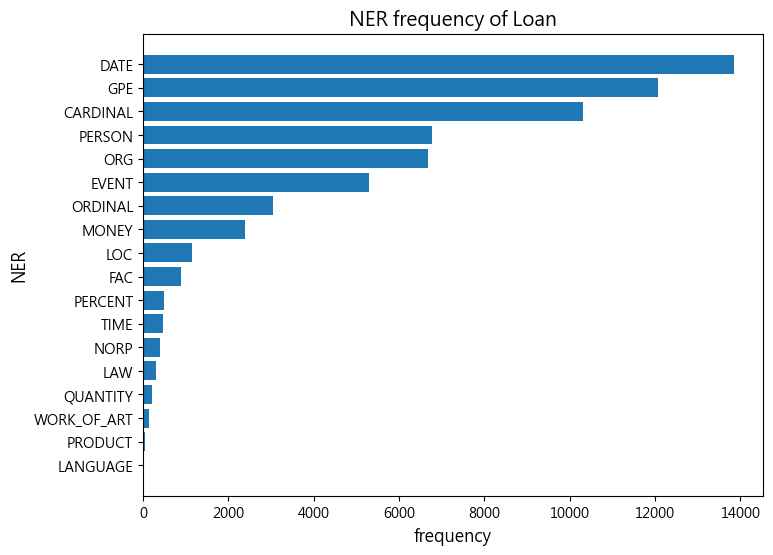

In [217]:
fig, ax = plt.subplots(figsize = (8,6))

ax.barh(ner_count['ner'], ner_count['count'])
ax.invert_yaxis()
ax.set_title('NER frequency of Loan',fontsize = 14)
ax.set_ylabel('NER', fontsize = 12)
ax.set_xlabel('frequency', fontsize = 12)

fig.show()

##### 涉及到的人名(PERSON)

Text(0.5, 0, 'Frequency')

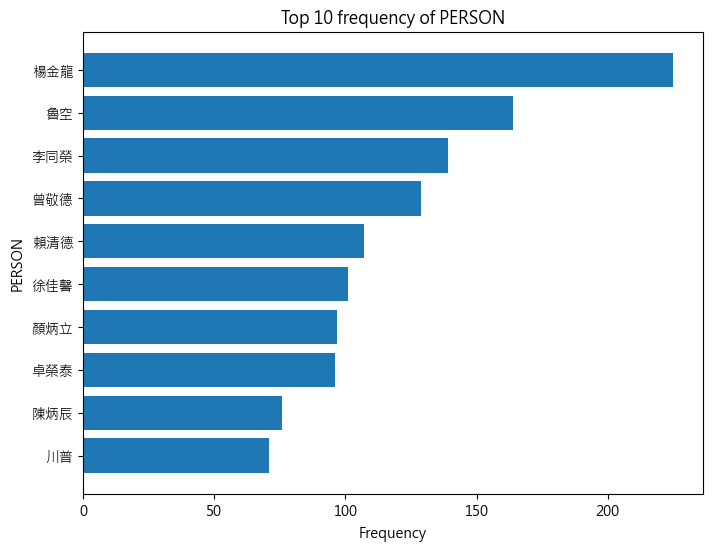

In [218]:
# 因為輸出發現楊金龍、金龍皆上榜，故合併兩詞
PERSON = entity_table[entity_table['ner'] == "PERSON"].groupby('word')['word'].count().reset_index(name="count")

# 依照條件清裡
PERSON = PERSON[PERSON['word'].str.len()>1]
PERSON['word'] = PERSON['word'].replace({"金龍":"楊金龍"})

# 因為replace的word也會被算入，所以前10要加1
PERSON = PERSON.sort_values('count', ascending=False).head(11)

fig, ax = plt.subplots(figsize = (8,6))
ax.barh(PERSON['word'], PERSON['count'])
ax.invert_yaxis()
ax.set_title("Top 10 frequency of PERSON")
ax.set_ylabel("PERSON")
ax.set_xlabel("Frequency")

- 進一步分析提及頻率的一、二名PERSON：楊金龍、魯空  
因為楊金龍為央行的總裁，所以在解釋新青安相關議題的時候常會被提及;至於提及數第二的魯空則代表無殼族，對新青安的態度抱持厭惡的看法。

In [219]:
key_word = ["楊金龍","魯空"]
sentence_table[sentence_table['sentence'].str.contains("|".join(key_word))]

,Unnamed: 0,status_id,sentence
145,145,5,這邊參考一下國外月亮比較圓的魯空最愛的美國的做法
857,857,17,原來楊金龍說的鼓勵家戶投資
1043,1043,24,反觀楊金龍還是上屆總統提名的
1051,1051,24,央行沒有依法行政沒彈劾你楊金龍已經很客氣了
2459,2459,47,是啊，感到悲憤焦慮剝奪感，房價也不會因此變便宜，我不是第一個魯空，也不會是最
...,...,...,...
124632,124632,3010,房蟲就是一直買一直爽，魯空就是一直租一直哭房價高
124653,124653,3010,魯空已經習慣活在平行時空了
124731,124731,3010,人貴自知魯空是例外
127281,127281,3079,魯空該擔心的是到時飯碗你還在不在


##### 涉及到的組織(ORG)

Text(0.5, 0, 'Frequency')

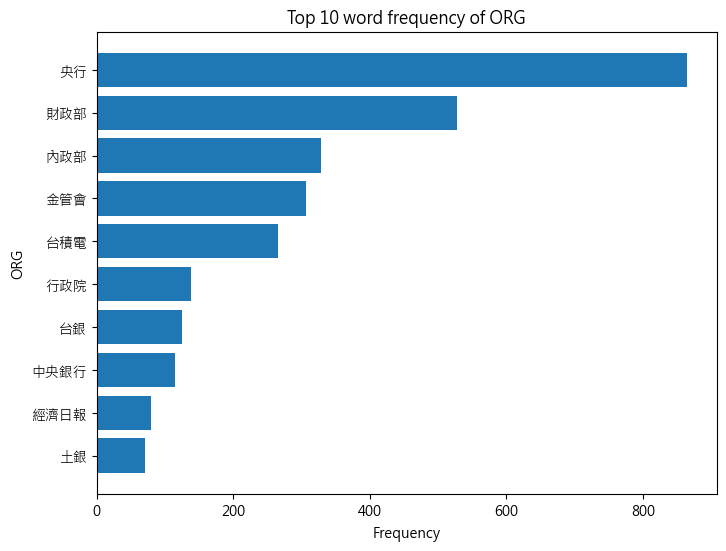

In [220]:
ORG = entity_table[entity_table['ner'] == 'ORG'].groupby('word')['word'].count().reset_index(name='count').sort_values('count',ascending=False).head(10)

fig, ax = plt.subplots(figsize = (8,6))

ax.barh(ORG['word'],ORG['count'])
ax.invert_yaxis()
ax.set_title('Top 10 word frequency of ORG')
ax.set_ylabel('ORG')
ax.set_xlabel('Frequency')

- 進一步分析提及頻率最高的ORG：央行、財政部  
因為信用管制與房貸的相關議題與央行有關，所以常被提及。例如，行政院鬆綁新青安(水龍頭)，央行出面說明放寬內容;
財政部則是公告新青安相關資訊的地方，如條件與限制，所以也常被提及。

In [221]:
key_word1 = ['央行','財政部']
sentence_table[sentence_table['sentence'].str.contains("|".join(key_word1))]

,Unnamed: 0,status_id,sentence
19,19,2,去年月日央行第七波選擇性信用管制出爐，成為這波房市多頭的轉折點，全台房價在去
28,28,2,月攀上的最高峰，之後隨著央行信用管制及銀行房貸放款緊縮，房市交易量急凍，高
83,83,5,連結金管會央行邀銀行研議開大房貸水龍頭
94,94,5,央行也找了數家銀行總座去喝咖啡，詢問目前房貸的承作
121,121,5,房貸卡關，不外乎兩項原因，一是銀行法條的三成上限滿水位，二是受限央行
...,...,...,...
126286,126286,3051,為健全房市並協助無自有住宅家庭購屋自住，財政部青年安心成家購屋優惠貸款下稱青
126290,126290,3051,財政部表示，青安貸款適用對象係成年，本人配偶及未成年子女無自有住宅者，民
127285,127285,3079,你做空房地產就是在跟央行和政府對做
127395,127395,3084,平均地權條例上路效應開始發酵央行推出第五波房市管制措施等影響下，設廠題材被過


##### 涉及到的國籍、宗教或政治團體(NORP)

In [222]:
NORP = entity_table[entity_table['ner'] == "NORP"].groupby('word')['word'].count().reset_index(name='count').sort_values('count', ascending=False)
NORP = entity_table[entity_table['word'].str.len()>1]
NORP


,Unnamed: 0,status_id,word,ner
0,0,1,新青安,EVENT
2,2,2,台北,GPE
3,3,2,年月日週一上午,TIME
4,4,2,去年月,DATE
5,5,2,第七,ORDINAL
...,...,...,...,...
64520,64520,3094,林依榕,PERSON
64521,64521,3094,行政院長,ORG
64522,64522,3094,陳建仁,PERSON
64523,64523,3094,青安,EVENT


Text(0.5, 0, 'Frequency')

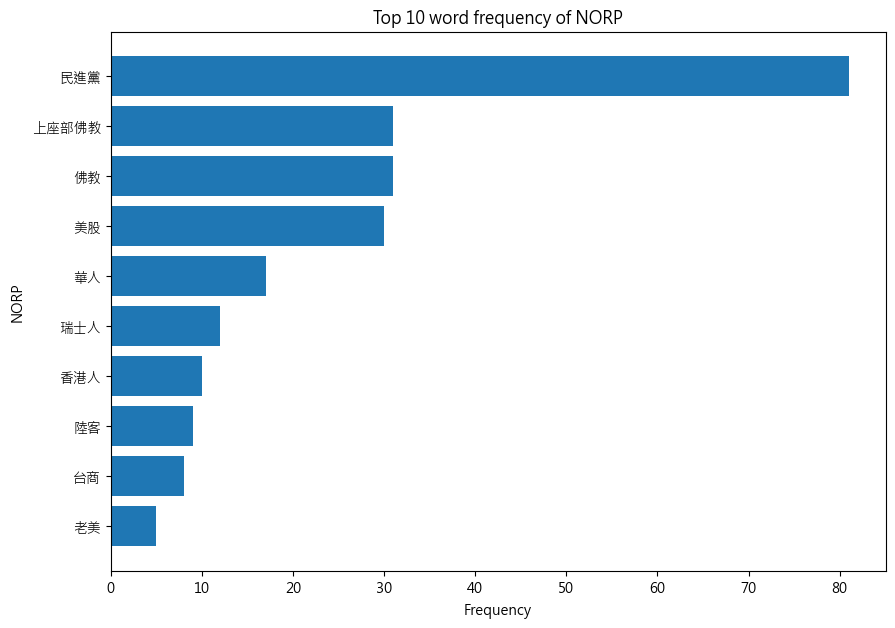

In [227]:
NORP = entity_table[entity_table['ner'] == 'NORP'].groupby('word')['word'].count().reset_index(name="count")
NORP = NORP[NORP['word'].str.len()>1]

NORP = NORP.sort_values('count',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10,7))
ax.barh(NORP['word'], NORP['count'])
ax.invert_yaxis()
ax.set_title("Top 10 word frequency of NORP")
ax.set_ylabel("NORP")
ax.set_xlabel("Frequency")


- 進一步分析提及頻率最高的NORP：民進黨  
因為新青安方案推出時的執政黨為民進黨，所以在討論上常出現


In [229]:
key_word2 = "民進黨"
sentence_table[sentence_table['sentence'].str.contains(key_word2)]

,Unnamed: 0,status_id,sentence
3129,3129,59,房價準備崩了，民進黨前桃園市議員王浩宇在臉書發文表示，看到最新數字，所有的預
3325,3325,64,民進黨遲遲無法解決楊金龍帶來的房貸緊縮問題，導致大家買不了房，
3491,3491,67,以前是有長老教會在民進黨鎮妖魔鬼怪才沒那麼多鳥事
3492,3492,67,但自從菜英文到民進黨都變了
3506,3506,68,其實你應該怪的不是民進黨
...,...,...,...
126172,126172,3047,內政部次長花敬群民進黨前主席卓榮泰與會，全國地政士後援會榮譽總會長黃志偉全
126211,126211,3048,民進黨的新青安炒房政策廢除
126220,126220,3048,民進黨政府高層郭總統肯定會開始查弊案
126504,126504,3057,說實在，懂的就知道降息的時候就是要崩盤了高雄這種鳥地方遲早，民進黨再怎麼亂


#### 3.3 POS分析

In [231]:
# 辨識出哪些POS種類
pos_table['pos'].unique()

array(['Na', 'VC', 'VB', 'Nc', 'VH', 'Nb', 'VJ', 'Neu', 'D', 'VE', 'Neqa',
       'T', 'Dfa', 'Nh', 'Nf', 'Ng', 'VA', 'COMMACATEGORY', 'VK', 'VG',
       'SHI', 'Cba', 'P', 'Caa', 'Nd', 'Nep', 'DE', 'VCL', 'VL', 'Ncd',
       'Da', 'A', 'Nes', 'Nv', 'VD', 'VI', 'Cbb', 'Cab', 'V_2', 'VAC',
       'FW', 'Di', 'VF', 'VHC', 'Dfb', 'Neqb', 'Dk', 'I', 'DM',
       'COLONCATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY',
       'ETCCATEGORY'], dtype=object)

- 出現頻率為前10的POS種類

In [244]:
filter = ['COMMACATEGORY','PARENTHESISCATEGORY','PERIODCATEGORY','COLONCATEGORY']
POS = pos_table[~pos_table['pos'].isin(filter)].groupby('pos')['pos'].count().reset_index(name='count').sort_values('count',ascending=False).head(10)
POS

,pos,count
16,Na,252496
5,D,156820
36,VC,87820
42,VH,78070
18,Nc,49080
6,DE,45967
30,P,41316
26,Nf,39403
28,Nh,34089
25,Neu,33871


Text(0.5, 0, 'Frequency')

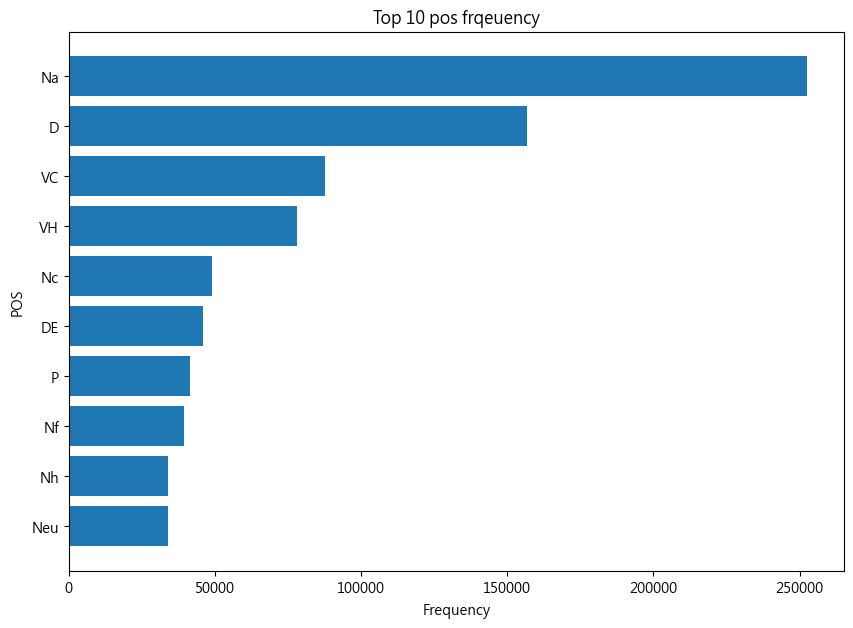

In [245]:
fig, ax = plt.subplots(figsize = (10,7))

ax.barh(POS['pos'], POS['count'])
ax.invert_yaxis()
ax.set_title("Top 10 pos frqeuency")
ax.set_ylabel('POS')
ax.set_xlabel('Frequency')

##### 涉及到的名詞(Nb)

Text(0.5, 0, 'Frequency')

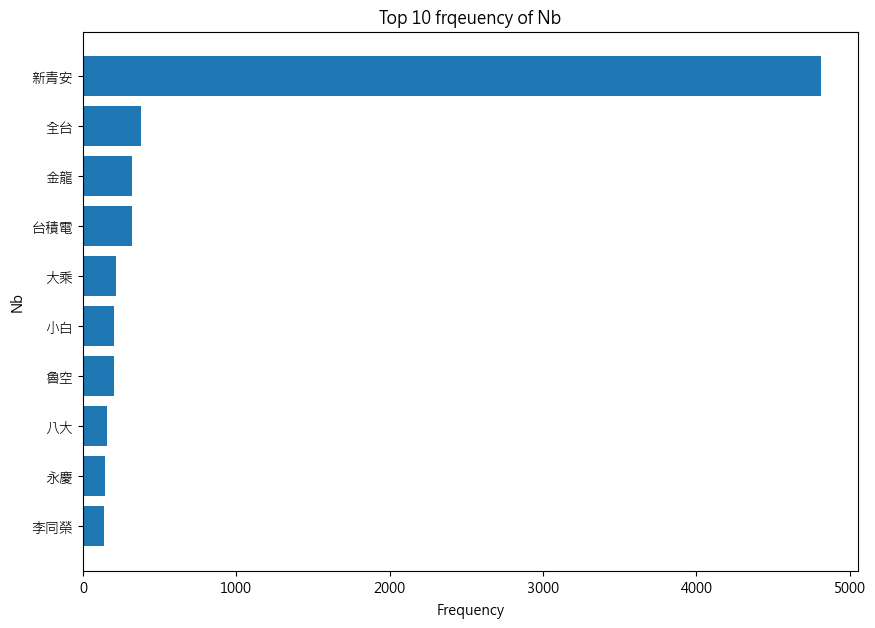

In [ ]:
# 此部分選擇特定專有名詞分析
Nb = pos_table[pos_table['pos'] == 'Nb'].groupby('word')['word'].count().reset_index(name = 'count')
Nb = Nb[Nb['word'].str.len()>1].sort_values('count',ascending=False).head(10)

fig, ax = plt.subplots(figsize = (10,7))

ax.barh(Nb['word'], Nb['count'])
ax.invert_yaxis()
ax.set_title("Top 10 frqeuency of Nb")
ax.set_ylabel('Nb')
ax.set_xlabel('Frequency')

##### 涉及到的動詞(VERB)

Text(0.5, 0, 'Frequency')

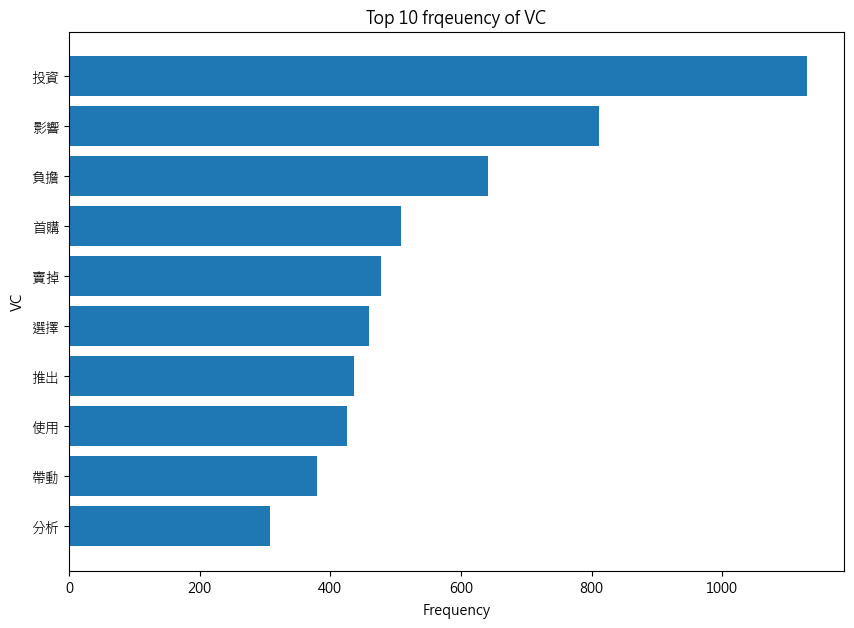

In [ ]:
# 此部分選擇VC(動作及物動詞)
VC = pos_table[pos_table['pos'] == 'VC'].groupby('word')['word'].count().reset_index(name = 'count')
VC = VC[VC['word'].str.len()>1].sort_values('count',ascending=False)
VC = VC[~VC['word'].isin(["連結"])].head(10) # 因為文章中含有網址的連結，故排除

fig, ax = plt.subplots(figsize = (10,7))

ax.barh(VC['word'], VC['count'])
ax.invert_yaxis()
ax.set_title("Top 10 frqeuency of VC")
ax.set_ylabel('VC')
ax.set_xlabel('Frequency')

- 進一步觀察出現詞為前三名的相關內容
    - 投資二字的出現頻率最高的原因在於，多數人認為首購族透過新青安購買房屋是為了投資用
    - 影響則與寬限期、炒房相關議題高度連結
    - 負擔則是因為某些人認為新青安可以減輕購房的壓力

In [283]:
vc_word = ['投資','影響','負擔']
sentence_table[sentence_table['sentence'].str.contains("|".join(vc_word))]

,Unnamed: 0,status_id,sentence
33,33,2,因產業投資新興建設等題材，引導資金湧入，房價漲幅大，如今投資買盤退散，房價修正
133,133,5,多額度留給首購自用，不給投資客或有炒房疑慮的對象
345,345,8,哪個實業主會想貸款投資台灣
419,419,9,多額度留給首購自用，不給投資客或有炒房疑慮的對象
453,453,10,房子是年買的預售，可以增貸一筆出來投資運用，雖然年變年，但是有一筆錢可以
...,...,...,...
127825,127825,3092,款仍要~萬元，對一般中產家庭負擔還是很大，新制影響的對象，會是錢準備差
127847,127847,3093,負擔外，對於目前市場中，建商推出量體驚人且銷售速度緩慢的首購宅來說，將可起到相
127867,127867,3094,買房負擔
127871,127871,3094,買房負擔


### 4. SnowNLP情緒分析

In [35]:
article = pd.read_csv('./raw_data/articles.csv', index_col= False)
article.insert(0, 'status_id', range(1, len(article)+1))
article

,status_id,title,time,url,content
0,1,[請益] 房貸選擇,2025/09/03 11:34,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益\n\n【A銀行】:\n8成\n新青安\n40年\n2年寬限期\n26萬壽險(不...
1,2,[新聞] 全台房價 自歷史高點回落0.59％,2025/09/03 11:40,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價 自歷史高點回落0.59％\n\n郭及天／台北報導\n2025年9月1日 週一 上午...
2,3,[請益] 關於內政部的自購住宅貸款利息補貼,2025/09/03 13:35,https://www.ptt.cc/bbs/home-sale/M.1756877717....,爬了許多文還是不太了解\n希望有大大能幫忙解答\n\n這麼說好了，目前我已經有申請新青安+5...
3,4,Re: [閒聊] 如果把所有房市政策鬆綁取消，台灣會變怎,2025/09/03 16:21,https://www.ptt.cc/bbs/home-sale/M.1756887702....,鬆綁怎麼就只鬆管制部份？你要回歸市場機制就要完全回歸。\n\n新青安就不用講，什麼首購最大這...
4,5,Re: [新聞] 金管會、央行邀銀行研議 開大房貸水龍頭,2025/09/02 17:14,https://www.ptt.cc/bbs/home-sale/M.1756804442....,: 連結：金管會、央行邀銀行研議 開大房貸水龍頭\n:\nhttps://www.ctee....
...,...,...,...,...,...
3089,3090,[新聞] 減輕年輕人買房負擔！青安貸款升級版今上,2023/08/01 23:51,https://www.ptt.cc/bbs/home-sale/M.1690905091....,減輕年輕人買房負擔！青安貸款升級版今上路 賴清德一張圖報你知\n\n連結：\nhttps:/...
3090,3091,Re: [閒聊] 85年次以後的年輕工程師有多慘？,2023/08/02 01:28,https://www.ptt.cc/bbs/home-sale/M.1690910883....,原文恕刪\n背景交代一下\n小弟正好85年次\n前年台大非電資科系碩班畢業\n上山非產線常日...
3091,3092,Fw: [新聞] 新青安貸款威力開始了?網曝新北預售屋齊,2023/08/02 09:01,https://www.ptt.cc/bbs/home-sale/M.1690938079....,作者: CNS3056 (奶奶) 看板: Gossiping\n標題: [新聞] 新青安貸款...
3092,3093,[新聞] 新青安房貸今上路 建商救命浮木來了？,2023/08/01 18:52,https://www.ptt.cc/bbs/home-sale/M.1690887173....,連結：\nhttps://money.udn.com/money/story/5621/73...


In [36]:
sentence_table = pd.read_csv('./raw_data/sentence_table.csv')
sentiment_date = pd.merge(sentence_table, article[['status_id','time']],on='status_id', how='left')
sentiment_date

,Unnamed: 0,status_id,sentence,time
0,0,1,貸款選擇請益,2025/09/03 11:34
1,1,1,銀行,2025/09/03 11:34
2,2,1,成,2025/09/03 11:34
3,3,1,新青安,2025/09/03 11:34
4,4,1,年,2025/09/03 11:34
...,...,...,...,...
127887,127887,3094,名化，並減少月經期間身心窘迫情形，讓不了解帶來的困擾消失,2023/08/01 07:54
127888,127888,3094,以往有訂出薪資行情價,2023/08/01 07:54
127889,127889,3094,現在房價起跳貸萬樓地板,2023/08/01 07:54
127890,127890,3094,火車頭要再次啟動了,2023/08/01 07:54


In [37]:
def get_sentiment(sentence):
    s = SnowNLP(sentence)
    return s.sentiments

sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date.head(5)

,Unnamed: 0,status_id,sentence,time,sentimentValue
0,0,1,貸款選擇請益,2025/09/03 11:34,0.097319
1,1,1,銀行,2025/09/03 11:34,0.500000
2,2,1,成,2025/09/03 11:34,0.429161
3,3,1,新青安,2025/09/03 11:34,0.500000
4,4,1,年,2025/09/03 11:34,0.549258


In [38]:
sentiment_date.to_csv('./raw_data/sentiment_date.csv')

In [40]:
sentiment_date = pd.read_csv('./raw_data/sentiment_date.csv').drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [41]:
sentiment_date['sentimentValue'].describe()

count    127892.000000
mean          0.364099
std           0.309055
min           0.000000
25%           0.071748
50%           0.298269
75%           0.585201
max           1.000000
Name: sentimentValue, dtype: float64

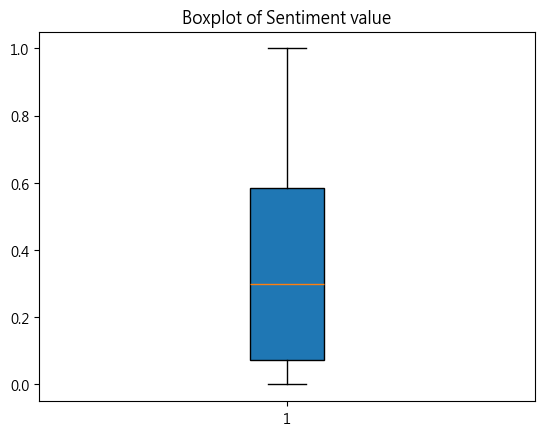

In [42]:
boxplot = plt.boxplot(sentiment_date['sentimentValue'], patch_artist=True)

plt.title('Boxplot of Sentiment value')
plt.show()

- 每日的情緒分數趨勢

In [57]:
sentiment_date['time'] = pd.to_datetime(sentiment_date['time']).dt.date
sentiment_of_date =sentiment_date.groupby(['time'])['sentimentValue'].mean().reset_index()
sentiment_of_date

,time,sentimentValue
0,2023-08-01,0.459411
1,2023-08-02,0.408992
2,2023-08-03,0.326180
3,2023-08-05,0.434378
4,2023-08-06,0.272359
...,...,...
645,2025-08-30,0.343279
646,2025-08-31,0.307837
647,2025-09-01,0.353723
648,2025-09-02,0.357783


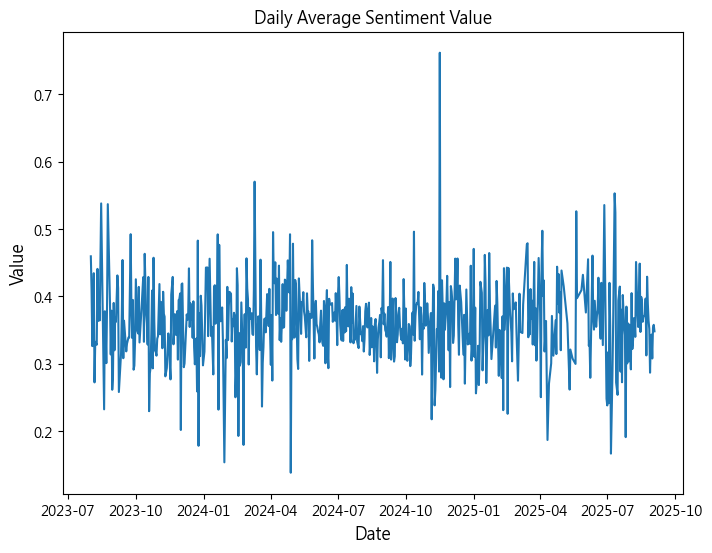

In [71]:
plt.figure(figsize = (8,6))
plt.plot(sentiment_of_date['time'], sentiment_of_date['sentimentValue'],linestyle = '-')
plt.title('Daily Average Sentiment Value')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Value',fontsize = 12)
plt.show()

### 5.TF-IDF